In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
training_df = pd.read_csv(filepath_or_buffer='https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')

# Scale the label
training_df['median_house_value'] /= 1000.0

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [4]:
def build_model(my_learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                    loss='mean_squared_error',
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [5]:
def train_model(model, df, feature, label, epochs, batch_size):
    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=batch_size,
                        epochs=epochs)

    trained_weight = model.get_weights()[0]
    trained_bais = model.get_weights()[1] 

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    rmse = hist['root_mean_squared_error']

    return trained_weight, trained_bais, epochs, rmse

In [6]:
def plot_the_model(trained_weight, trained_bias, feature, label):

    plt.xlabel(feature)
    plt.ylabel(label)

    random_examples = training_df.sample(200)
    plt.scatter(random_examples[feature], random_examples[label])

    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c='r')
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error')

    plt.plot(epochs, rmse, label='Loss')
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

Epoch 1/30


c:\Users\Eduardo\miniconda3\envs\ml_dev\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


567/567 [==============================] - 4s 6ms/step - loss: 68962.2188 - root_mean_squared_error: 262.6066
Epoch 2/30
567/567 [==============================] - 4s 6ms/step - loss: 28024.5137 - root_mean_squared_error: 167.4052
Epoch 3/30
567/567 [==============================] - 3s 5ms/step - loss: 27228.4355 - root_mean_squared_error: 165.0104
Epoch 4/30
567/567 [==============================] - 3s 6ms/step - loss: 26527.7773 - root_mean_squared_error: 162.8735
Epoch 5/30
567/567 [==============================] - 4s 6ms/step - loss: 25829.8730 - root_mean_squared_error: 160.7168
Epoch 6/30
567/567 [==============================] - 4s 7ms/step - loss: 24871.8125 - root_mean_squared_error: 157.7080
Epoch 7/30
567/567 [==============================] - 4s 6ms/step - loss: 24295.2793 - root_mean_squared_error: 155.8694
Epoch 8/30
567/567 [==============================] - 4s 6ms/step - loss: 23983.6582 - root_mean_squared_error: 154.8666
Epoch 9/30
567/567 [=======================

c:\Users\Eduardo\miniconda3\envs\ml_dev\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


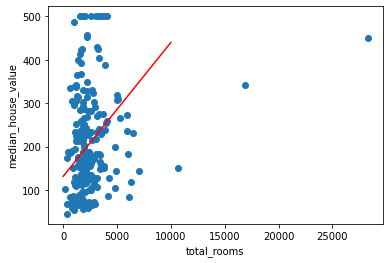

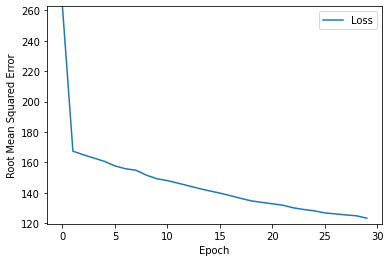

In [7]:
learning_rate = 0.01
epochs = 30
batch_size = 30

my_feature = 'total_rooms'
my_label = 'median_house_value'

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                            my_feature, my_label,
                                            epochs, batch_size)

print('\nweight %.4f' % weight)
print('bias %.4f\n' % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)